# TASK 4

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

Loading the Datasets

In [2]:
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
data = pd.read_csv ("Task4_twitter_training.csv" , names=col)

In [3]:
test =pd.read_csv("Task4_twitter_validation.csv" , names=col)

Basic Understanding of the Dataset

In [4]:
data.head()

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
data.tail()

,Id,Entity,Sentiment,Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
data.shape

(74682, 4)

In [8]:
data.describe()

,Id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
data.dtypes

Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [10]:
data.columns

Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [11]:
data.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [12]:
data.duplicated().sum()

2700

In [13]:
test.head()

,Id,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [14]:
test.tail()

,Id,Entity,Sentiment,Content
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
999,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1000 non-null   int64 
 1   Entity     1000 non-null   object
 2   Sentiment  1000 non-null   object
 3   Content    1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [16]:
test.shape

(1000, 4)

In [17]:
test.describe()

,Id
count,1000.000000
mean,6432.088000
std,3728.310569
min,6.000000
25%,3247.750000
50%,6550.000000
75%,9661.750000
max,13197.000000


In [18]:
test.dtypes

Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object

In [19]:
test.columns

Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [20]:
test.isnull().sum()

Id           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [21]:
test.duplicated().sum()

0

Exploratary Data Analysis

Sentiment

In [22]:
sentiment_count=data.Sentiment.value_counts()
sentiment_count

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

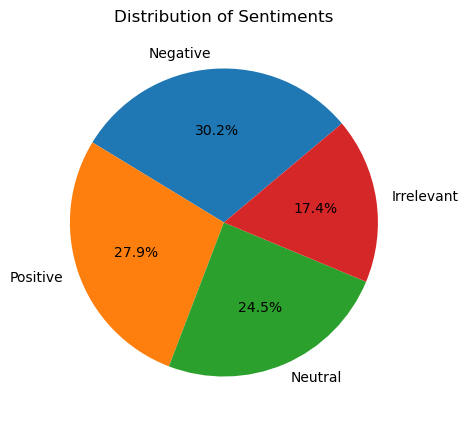

In [23]:
#Visualizing Distribution of sentiments towards different entities in a pie chart
plt.figure(figsize=(5,5))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%',startangle=40)
plt.title('Distribution of Sentiments')
plt.show()

In [24]:
data.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [25]:
Entity_count=data.Entity.value_counts()
Entity_count

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [26]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [27]:
Entity_top10=Entity_sort.head(10)
Entity_top10

TomClancysRainbowSix         2400
MaddenNFL                    2400
Microsoft                    2400
LeagueOfLegends              2394
CallOfDuty                   2394
Verizon                      2382
CallOfDutyBlackopsColdWar    2376
ApexLegends                  2376
Facebook                     2370
WorldOfCraft                 2364
Name: Entity, dtype: int64

In [28]:
Entity_index=Entity_top10.index

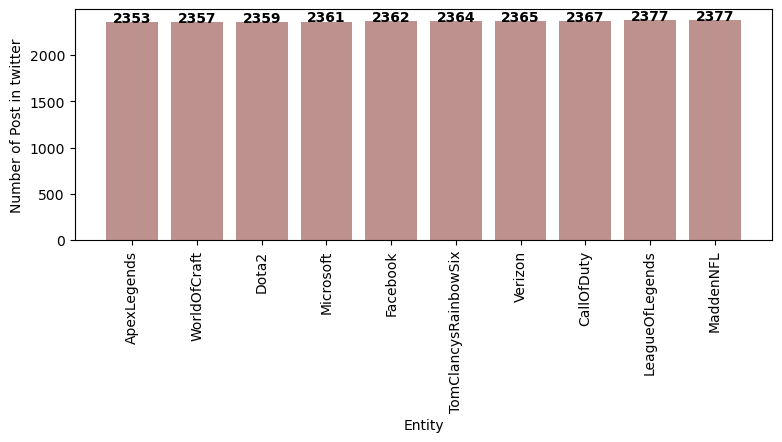

In [29]:
plt.figure(figsize=(9,3))

x = ['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y = [2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#A2625D')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=90)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

In [30]:
test=data['Entity'].value_counts()
test

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)               

In [31]:
top5_entitycounts=data['Entity'].value_counts().sort_values(ascending=False)[:5]
top5_entitycounts

TomClancysRainbowSix    2400
MaddenNFL               2400
Microsoft               2400
LeagueOfLegends         2394
CallOfDuty              2394
Name: Entity, dtype: int64

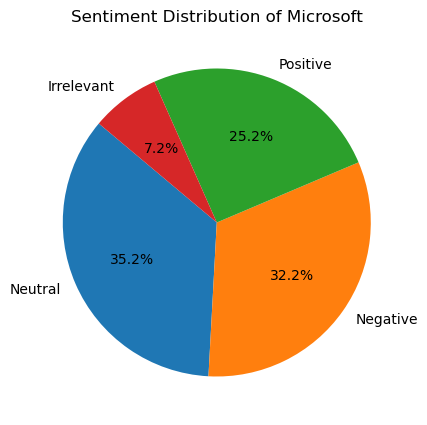

In [32]:
entity_data = data[data['Entity'] == 'Microsoft']

# Count occurrences of each sentiment category
sentiment_counts = entity_data.Sentiment.value_counts()

# Create a bar chart
plt.figure(figsize=(5,5))
labels = sentiment_counts.index  # Labels for pie chart segments
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Microsoft')
plt.show()

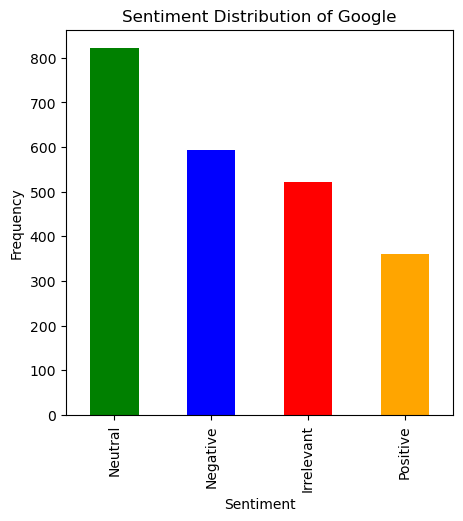

In [33]:
entity_data = data[data['Entity'] == 'Google']

# Count occurrences of each sentiment
sentiment_counts = entity_data['Sentiment'].value_counts()

plt.figure(figsize=(5,5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red', 'orange'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Google')
plt.show()

In [34]:
Entity_top2_df=Entity_sort.head(2)
Entity_top2_df

TomClancysRainbowSix    2400
MaddenNFL               2400
Name: Entity, dtype: int64

In [35]:
Entity_top2=Entity_top2_df.index.tolist()
Entity_top2

['TomClancysRainbowSix', 'MaddenNFL']

In [36]:
sentiment_by_entity=data.loc[data['Entity'].isin(Entity_top2)].groupby('Entity')['Sentiment'].value_counts().sort_index()
sentiment_by_entity

Entity                Sentiment 
MaddenNFL             Irrelevant      90
                      Negative      1710
                      Neutral        204
                      Positive       396
TomClancysRainbowSix  Irrelevant      96
                      Negative      1122
                      Neutral        654
                      Positive       528
Name: Sentiment, dtype: int64

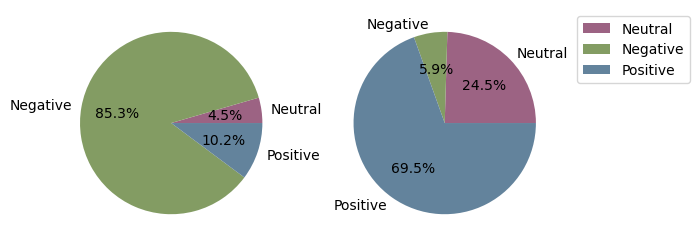

In [37]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#9C6383' , '#839C63' , '#63839C']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")